In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting
from matplotlib import pyplot
from matplotlib.pyplot import figure
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.options.mode.chained_assignment = None  # default='warn'

# Preprocessing

In [208]:
df_glucose = pd.read_csv('Glucose_measurements_sample.csv', dtype={'Glucose_measurements' : int})

Number of patients:

In [209]:
df_glucose["Patient_ID"].value_counts().shape[0]
df_glucose

,Patient_ID,Measurement_date,Measurement_time,Measurement
0,LIB193263,2020-06-09,19:08:00,99
1,LIB193263,2020-06-09,19:23:00,92
2,LIB193263,2020-06-09,19:38:00,86
3,LIB193263,2020-06-09,19:53:00,85
4,LIB193263,2020-06-09,20:08:00,85
...,...,...,...,...
2999995,LIB193424,2022-01-02,01:05:00,207
2999996,LIB193424,2022-01-02,01:20:00,215
2999997,LIB193424,2022-01-02,01:35:00,218
2999998,LIB193424,2022-01-02,01:50:00,222


Chosen a random patient to try transformations

In [199]:
patient1 = df_glucose[df_glucose['Patient_ID'] == 'LIB193277' ]
patient1.describe()


,Measurement
count,114598.000000
mean,120.613903
std,36.363395
min,40.000000
25%,94.000000
50%,116.000000
75%,143.000000
max,382.000000


## Plotting data

Text(0.5, 1.0, 'BG serie LIB193277')

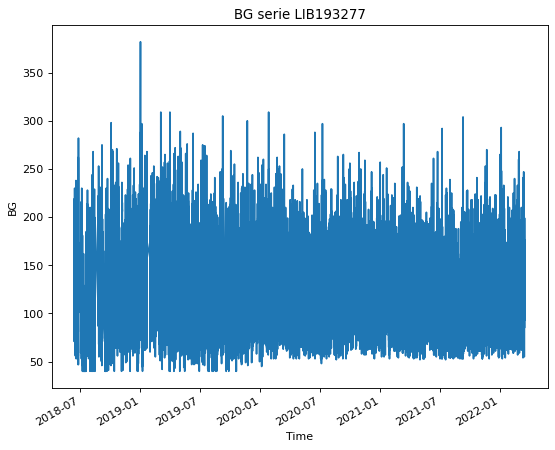

In [200]:
patient1["time"] = pd.to_datetime(patient1["Measurement_date"] + ' ' + patient1["Measurement_time"])

figure(figsize=(8, 6), dpi=80)
plt.xticks(rotation=30, ha='right')
plt.plot(patient1.time,patient1.Measurement)
plt.xlabel('Time')
plt.ylabel('BG')
plt.title('BG serie LIB193277')

## Adding time features

In [201]:
patient1["Measurement_date"] = pd.to_datetime(patient1["Measurement_date"],
                                              format = '%Y-%m-%d',
                                              errors = 'raise')
patient1["Year"] = patient1["Measurement_date"].dt.year
patient1["Month"] = patient1["Measurement_date"].dt.month
patient1["Day"] = patient1["Measurement_date"].dt.day
patient1["Day_of_week"] = patient1["Measurement_date"].dt.dayofweek
patient1["Is_weekend"] = (patient1["Measurement_date"].dt.dayofweek > 4).astype(int)

patient1["Measurement_time"] = pd.to_datetime(patient1["Measurement_time"],
                                              format = '%H:%M:%S',
                                              errors = 'raise')
patient1["Hour"] = patient1["Measurement_time"].dt.hour

patient1 = patient1.drop('Measurement_date',axis=1)
patient1 = patient1.drop('Measurement_time',axis=1)
patient1

,Patient_ID,Measurement,time,Year,Month,Day,Day_of_week,Is_weekend,Hour
391016,LIB193277,156,2018-06-12 20:18:00,2018,6,12,1,0,20
391017,LIB193277,163,2018-06-12 20:33:00,2018,6,12,1,0,20
391018,LIB193277,158,2018-06-12 20:48:00,2018,6,12,1,0,20
391019,LIB193277,167,2018-06-12 21:03:00,2018,6,12,1,0,21
391020,LIB193277,139,2018-06-12 21:17:00,2018,6,12,1,0,21
...,...,...,...,...,...,...,...,...,...
505609,LIB193277,153,2022-03-18 10:59:00,2022,3,18,4,0,10
505610,LIB193277,144,2022-03-18 11:14:00,2022,3,18,4,0,11
505611,LIB193277,134,2022-03-18 11:29:00,2022,3,18,4,0,11
505612,LIB193277,125,2022-03-18 11:44:00,2022,3,18,4,0,11


## Working only with January 2020 to better visualization

Text(0.5, 1.0, 'March 2020 LIB193277')

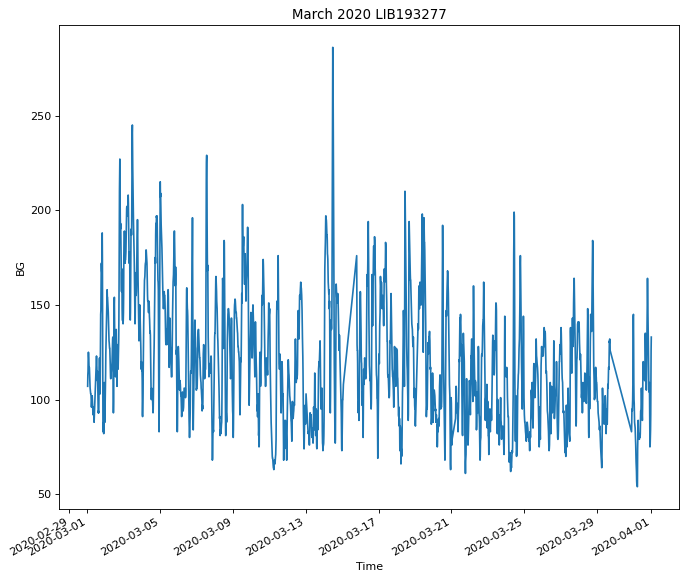

In [202]:
patient1_march = patient1[patient1["Month"] == 3 ]
patient1_march = patient1_march[patient1_march["Year"] == 2020]

figure(figsize=(10, 8), dpi=80)
plt.xticks(rotation=30, ha='right')
plt.plot(patient1_march.time,patient1_march.Measurement)
plt.xlabel('Time')
plt.ylabel('BG')
plt.title("March 2020 LIB193277")


## Comparing histograms

array([[<AxesSubplot:title={'center':'Measurement'}>]], dtype=object)

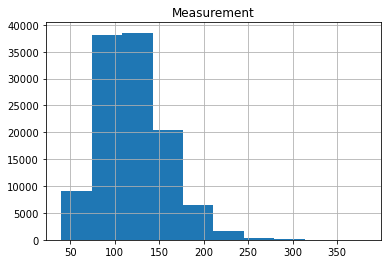

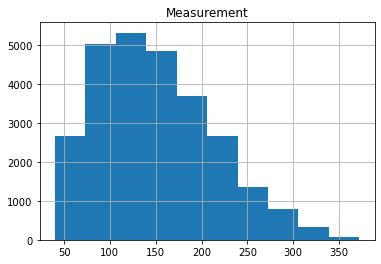

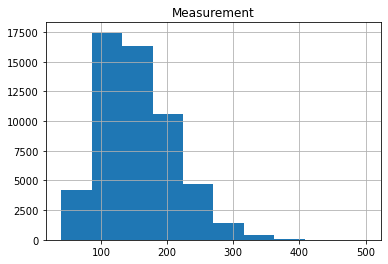

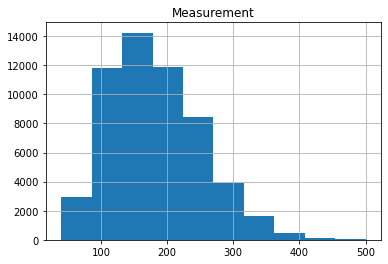

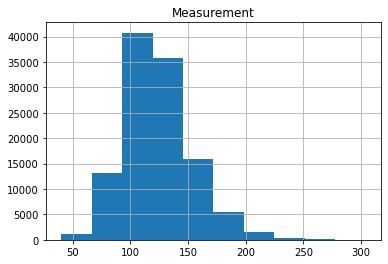

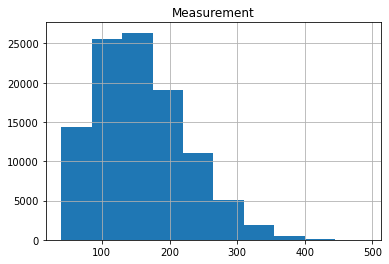

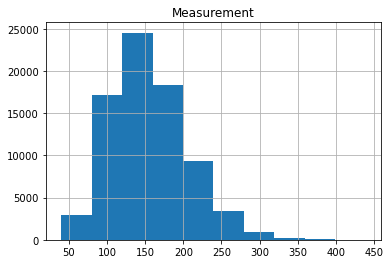

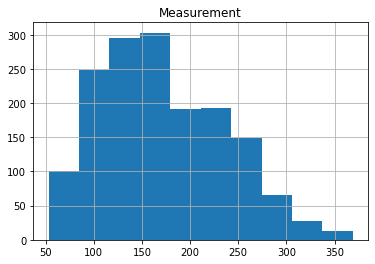

In [203]:
def get_march2020_data(id):
    patient = df_glucose[df_glucose['Patient_ID'] == id ]
    patient["time"] = pd.to_datetime(patient["Measurement_date"] + ' ' + patient["Measurement_time"])
    patient["Measurement_date"] = pd.to_datetime(patient["Measurement_date"],
                                                  format = '%Y-%m-%d',
                                                  errors = 'raise')
    patient["Year"] = patient["Measurement_date"].dt.year
    patient["Month"] = patient["Measurement_date"].dt.month
    patient["Day"] = patient["Measurement_date"].dt.day
    patient["Day_of_week"] = patient["Measurement_date"].dt.dayofweek
    patient["Is_weekend"] = (patient["Measurement_date"].dt.dayofweek > 4).astype(int)

    patient["Measurement_time"] = pd.to_datetime(patient["Measurement_time"],
                                                  format = '%H:%M:%S',
                                                  errors = 'raise')
    patient["Hour"] = patient["Measurement_time"].dt.hour

    patient = patient.drop('Measurement_date',axis=1)
    patient = patient.drop('Measurement_time',axis=1)



    return patient



patient1 = get_march2020_data("LIB193277")
patient2 = get_march2020_data("LIB193264")
patient3 = get_march2020_data("LIB193266")
patient4 = get_march2020_data("LIB193267")
patient5 = get_march2020_data("LIB193385")
patient6 = get_march2020_data("LIB193307")
patient7 = get_march2020_data("LIB193367")
patient8 = get_march2020_data("LIB193414")

patient1.hist(column="Measurement")
patient2.hist(column="Measurement")
patient3.hist(column="Measurement")
patient4.hist(column="Measurement")
patient5.hist(column="Measurement")
patient6.hist(column="Measurement")
patient7.hist(column="Measurement")
patient8.hist(column="Measurement")




Difficult to compare using histograms bc different number
of values per patient

## Box and Whisker plot:
   - Pink one (last) less outliers.
   - Dark green (middle) very close higher and lower measurements

[Text(0.5, 1.0, 'Boxplot'), Text(0.5, 0, ''), Text(0, 0.5, 'BG')]

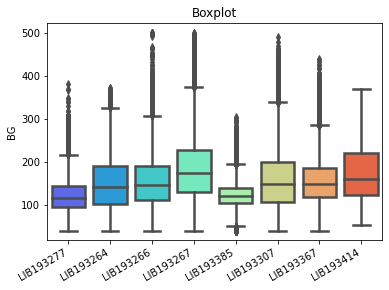

In [169]:
four_patients = pd.concat([
    patient1, patient2, patient3, patient4, patient5, patient6, patient7, patient8
])

ax = sns.boxplot(data=four_patients, x='Patient_ID', y='Measurement', palette="rainbow", linewidth=2.5)
plt.xticks(rotation=30, ha='right')
ax.set(title='Boxplot', xlabel='', ylabel='BG')

## Lag plot: The relation its clea
- Note: In patient 2 we have a value y(t)=50, y(t+1)>350. Measurement error???
## Idea for outliers treatment: Absurd difference changes between two values

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

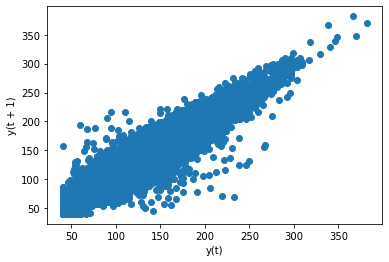

In [177]:
pd.plotting.lag_plot(patient1["Measurement"])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

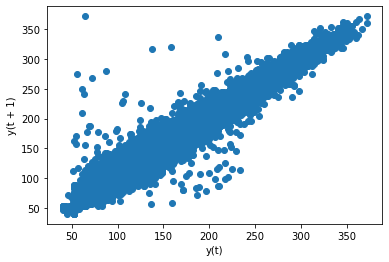

In [178]:
pd.plotting.lag_plot(patient2["Measurement"])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

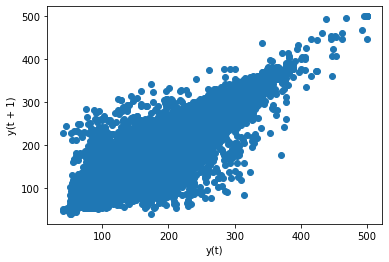

In [179]:
pd.plotting.lag_plot(patient3["Measurement"])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

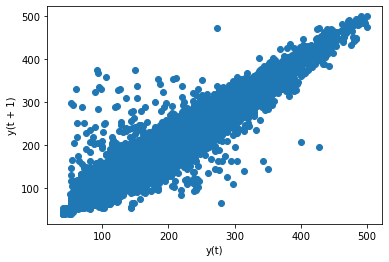

In [180]:
pd.plotting.lag_plot(patient4["Measurement"])

## Calculate the correlation

In [183]:
#PATIENT1
values = pd.DataFrame(patient1['Measurement'].values)
patient1_lagged = pd.concat([values.shift(1), values], axis=1)
patient1_lagged.columns = ['t', 't+1']
patient1_lagged

,t,t+1
0,NaN,156
1,156.000000,163
2,163.000000,158
3,158.000000,167
4,167.000000,139
...,...,...
114593,159.000000,153
114594,153.000000,144
114595,144.000000,134
114596,134.000000,125


In [185]:
patient1_lagged.corr()

,t,t+1
t,1.000000,0.962010
t+1,0.962010,1.000000


In [187]:
#PATIENT2
values = pd.DataFrame(patient2['Measurement'].values)
patient2_lagged = pd.concat([values.shift(1), values], axis=1)
patient2_lagged.columns = ['t', 't+1']
patient2_lagged.corr()

,t,t+1
t,1.000000,0.978658
t+1,0.978658,1.000000


## Autocorrelation plots

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

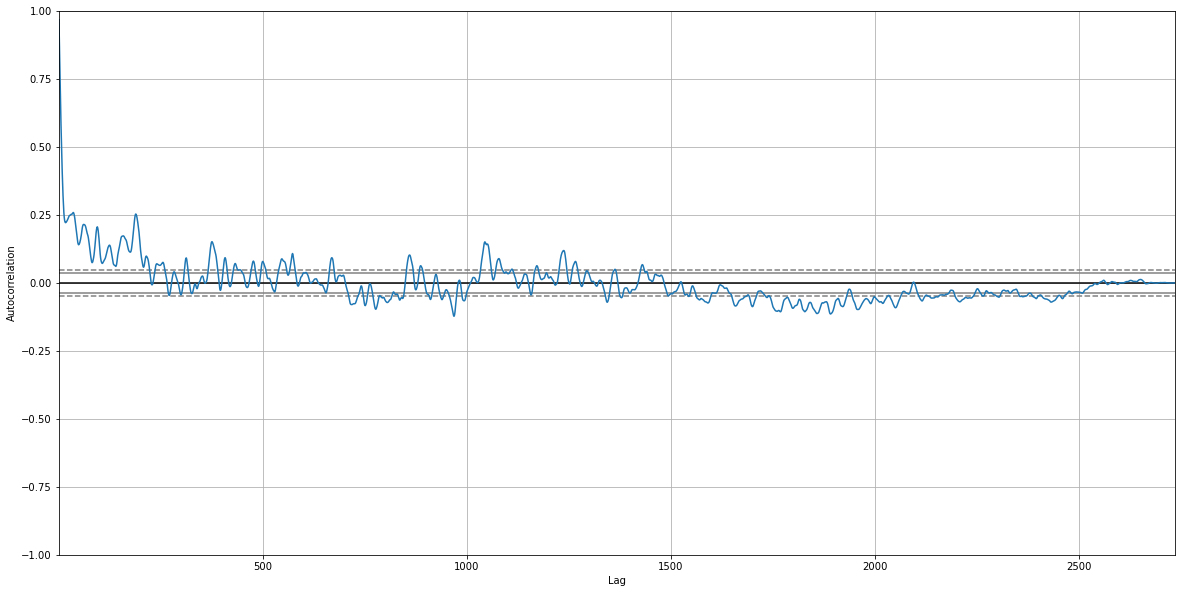

In [206]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(patient1_march["Measurement"])

## Experiment:
To fix outliers, we are going to calculate what is the normal
blood glucose changes (15 minutes) in our data

In [251]:
#Lagg 1 for patirent 1
def get_lag1(patient):
    bg_lagged1 = pd.DataFrame(patient['Measurement'])
    bg_lagged1["t"] = bg_lagged1["Measurement"].shift(1)
    bg_lagged1 = bg_lagged1.rename(columns={'Measurement': 't+1'})

    #Remove first row
    bg_lagged1 = bg_lagged1.dropna()

    bg_lagged1["diff"] = abs(bg_lagged1["t+1"] - bg_lagged1["t"])

    return bg_lagged1

patient1_lagged = get_lag1(patient1)
patient1_lagged

,t+1,t,diff
391017,163,156.000000,7.000000
391018,158,163.000000,5.000000
391019,167,158.000000,9.000000
391020,139,167.000000,28.000000
391021,120,139.000000,19.000000
...,...,...,...
505609,153,159.000000,6.000000
505610,144,153.000000,9.000000
505611,134,144.000000,10.000000
505612,125,134.000000,9.000000


In [252]:
patient1_lagged["diff"].describe()

count   114597.000000
mean         6.936665
std          7.235455
min          0.000000
25%          2.000000
50%          5.000000
75%          9.000000
max        163.000000
Name: diff, dtype: float64

In [242]:
patient1_lagged["diff"].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.250000    3.000000
0.500000    6.000000
0.750000   12.000000
0.900000   19.000000
0.950000   25.000000
0.990000   39.000000
Name: diff, dtype: float64

In [253]:
# For other patients

patient2_lagged = get_lag1(patient2)
patient3_lagged = get_lag1(patient3)
patient4_lagged = get_lag1(patient4)
patient5_lagged = get_lag1(patient5)
patient6_lagged = get_lag1(patient6)
patient7_lagged = get_lag1(patient7)
patient8_lagged = get_lag1(patient8)

patient2_lagged["diff"].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])



0.250000    3.000000
0.500000    6.000000
0.750000   12.000000
0.900000   19.000000
0.950000   25.000000
0.990000   39.000000
Name: diff, dtype: float64

In [254]:
patient3_lagged["diff"].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.250000    2.000000
0.500000    6.000000
0.750000   15.000000
0.900000   30.000000
0.950000   42.000000
0.990000   81.940000
Name: diff, dtype: float64

In [255]:
patient4_lagged["diff"].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.250000    3.000000
0.500000    6.000000
0.750000   13.000000
0.900000   23.000000
0.950000   30.000000
0.990000   50.000000
Name: diff, dtype: float64

In [256]:
patient5_lagged["diff"].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.250000    2.000000
0.500000    5.000000
0.750000    9.000000
0.900000   15.000000
0.950000   21.000000
0.990000   35.000000
Name: diff, dtype: float64

In [257]:
patient6_lagged["diff"].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.250000    3.000000
0.500000    7.000000
0.750000   13.000000
0.900000   20.000000
0.950000   26.000000
0.990000   38.000000
Name: diff, dtype: float64

In [258]:
patient7_lagged["diff"].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.250000    3.000000
0.500000    6.000000
0.750000   12.000000
0.900000   21.000000
0.950000   28.000000
0.990000   43.000000
Name: diff, dtype: float64

In [259]:
patient8_lagged["diff"].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.250000    3.000000
0.500000    8.000000
0.750000   15.000000
0.900000   24.000000
0.950000   30.000000
0.990000   41.140000
Name: diff, dtype: float64

In [263]:
#Try and error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting
from matplotlib import pyplot
from matplotlib.pyplot import figure
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.options.mode.chained_assignment = None  # default='warn'


class Utils:
    _instance = None

    def __new__(cls):
        if cls._instance is None:
            cls._instance = super().__new__(cls)
            cls._instance.df_glucose = pd.read_csv('Glucose_measurements_sample.csv',
                                                   dtype={'Glucose_measurements': int})
        return cls._instance

    def get_patient_data_df(self, patient_id):
        return self.df_glucose[self.df_glucose['Patient_ID'] == patient_id]

    def get_patient_ids(self):
        return self.df_glucose['Patient_ID'].unique()


utils = Utils()
utils.get_patient_data_df("LIB193277")

,Patient_ID,Measurement_date,Measurement_time,Measurement
391016,LIB193277,2018-06-12,20:18:00,156
391017,LIB193277,2018-06-12,20:33:00,163
391018,LIB193277,2018-06-12,20:48:00,158
391019,LIB193277,2018-06-12,21:03:00,167
391020,LIB193277,2018-06-12,21:17:00,139
...,...,...,...,...
505609,LIB193277,2022-03-18,10:59:00,153
505610,LIB193277,2022-03-18,11:14:00,144
505611,LIB193277,2022-03-18,11:29:00,134
505612,LIB193277,2022-03-18,11:44:00,125


In [2]:
# Testing gap problem
import pandas as pd
import numpy as np

def get_lagged_col(df, col, new_col_name, diff_name, diff_time_treatment,
                   absolute_value, output_df = None):
    """


    :param df: Dataframe to lagg, if not all dataset
    :param col: Column to lag
    :param new_col_name: New name of lagged column
    :param diff_name: Name of diff column
    :param diff_time_treatment: Time difference treatment
    :param output_df: If not null, add the columns instead create a new df
    :param absolute_value: If true abs value diff
    :return: A df with three columns: col, col-1 and difference


    """
    df_lag = pd.DataFrame(df[col])
    df_lag[new_col_name] = df_lag[col].shift(1)
    df_lag = df_lag.rename(columns={col: f"{new_col_name}+1"})

    # Remove first row (Nan)
    df_lag = df_lag.dropna()

    # Create diff col
    df_lag[diff_name] = df_lag[f"{new_col_name}+1"] - df_lag[new_col_name]
    if absolute_value:
        df_lag[diff_name] = abs(df_lag[diff_name])
    if diff_time_treatment:
        df_lag[diff_name] = df_lag[diff_name] / np.timedelta64(1, 'm')

    if output_df is not None:
        for col in output_df.head():
            df_lag[col] = output_df[col]

    return df_lag

def read_dataset():
    """

    :return: Complete dataset
    """
    df_glucose = pd.read_csv('Glucose_measurements_sample.csv',
                              dtype={'Glucose_measurements': int})
    add_features(df_glucose)

    return df_glucose

def add_features(df_glucose):
    """

    :param df_glucose:
    :return: Add a unify temporal and date column
    """
    df_glucose["Time"] = pd.to_datetime(df_glucose["Measurement_date"] + ' '
                                        + df_glucose["Measurement_time"])

def get_patient_data_df(patient_id, df = None):
    """

    :param patient_id:
    :param df:
    :return: All data of a patient
    """
    if not df:
        df = read_dataset()
    return df[df['Patient_ID'] == patient_id]


patient1 = get_patient_data_df("LIB193277")
patient1

,Patient_ID,Measurement_date,Measurement_time,Measurement,Time
391016,LIB193277,2018-06-12,20:18:00,156,2018-06-12 20:18:00
391017,LIB193277,2018-06-12,20:33:00,163,2018-06-12 20:33:00
391018,LIB193277,2018-06-12,20:48:00,158,2018-06-12 20:48:00
391019,LIB193277,2018-06-12,21:03:00,167,2018-06-12 21:03:00
391020,LIB193277,2018-06-12,21:17:00,139,2018-06-12 21:17:00
...,...,...,...,...,...
505609,LIB193277,2022-03-18,10:59:00,153,2022-03-18 10:59:00
505610,LIB193277,2022-03-18,11:14:00,144,2022-03-18 11:14:00
505611,LIB193277,2022-03-18,11:29:00,134,2022-03-18 11:29:00
505612,LIB193277,2022-03-18,11:44:00,125,2022-03-18 11:44:00


In [3]:
lagged = get_lagged_col(df=patient1, col="Time", new_col_name="t",
                        absolute_value=False, diff_name="Minutes_diff",
                        diff_time_treatment=True)
lagged


,t+1,t,Minutes_diff
391017,2018-06-12 20:33:00,2018-06-12 20:18:00,15.0
391018,2018-06-12 20:48:00,2018-06-12 20:33:00,15.0
391019,2018-06-12 21:03:00,2018-06-12 20:48:00,15.0
391020,2018-06-12 21:17:00,2018-06-12 21:03:00,14.0
391021,2018-06-12 21:32:00,2018-06-12 21:17:00,15.0
...,...,...,...
505609,2022-03-18 10:59:00,2022-03-18 10:44:00,15.0
505610,2022-03-18 11:14:00,2022-03-18 10:59:00,15.0
505611,2022-03-18 11:29:00,2022-03-18 11:14:00,15.0
505612,2022-03-18 11:44:00,2022-03-18 11:29:00,15.0


In [4]:
lagged[ (lagged["Minutes_diff"] > 50)]


,t+1,t,Minutes_diff
391121,2018-06-13 23:33:00,2018-06-13 22:18:00,75.0
391220,2018-06-15 10:03:00,2018-06-15 00:03:00,600.0
391387,2018-06-17 04:32:00,2018-06-17 03:32:00,60.0
391541,2018-06-19 01:33:00,2018-06-18 19:03:00,390.0
391663,2018-06-20 09:03:00,2018-06-20 07:48:00,75.0
...,...,...,...
500335,2022-01-22 00:25:00,2022-01-21 22:11:00,134.0
501672,2022-02-05 01:03:00,2022-02-04 23:06:00,117.0
502997,2022-02-19 00:04:00,2022-02-18 22:38:00,86.0
504333,2022-03-05 00:53:00,2022-03-04 22:39:00,134.0


In [5]:

lagged[ (lagged["Minutes_diff"] > 50)].shape[0]


452